<a href="https://colab.research.google.com/github/ownit4137/TIL/blob/main/DLCV/OD/210202_OpenCV_prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

!pwd

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/content


### Image

- OpenCV의 imread()는 사진을 **BGR 넘파이 배열**로 리턴함
- OpenCV의 imwrite()는 BGR을 RGB로 바꿔 저장, 변환에 신경쓰지 않아도 됨

(633, 806, 3)


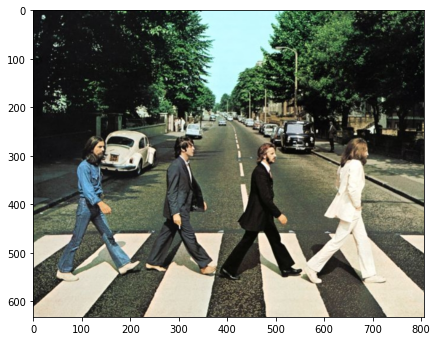

In [ ]:
import cv2
import matplotlib.pyplot as plt

bgr_image = cv2.imread("/gdrive/MyDrive/Colab Notebooks/DLCV_inflearn/DLCV/data/image/beatles01.jpg")

rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
print(rgb_image.shape)

plt.figure(figsize=(7, 7))
plt.imshow(rgb_image)
plt.show()

## Video

- OpenCV는 간편하게 비디오 영상처리를 할 수 있는 API를 제공
- VideoCapture 객체는 Video Streaming을 Frame 별로 Capture하여 처리할 수 있는 기능 제공
- VideoWriter 객체는 VideoCapture로 읽어들인 Frame을 동영상으로 Write하는 기능 제공
- 리눅스에서는 코덱은 *'XVID', 확장자는 .avi로 설정해야 오류가 없음
- VC.read()와 VW.write()가 실행되면 알아서 BGR, RGB로의 변환이 일어남

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('/gdrive/MyDrive/Colab Notebooks/DLCV_inflearn/DLCV/data/video/John_Wick_small.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video width=800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
import cv2

video_input_path = '/gdrive/MyDrive/Colab Notebooks/DLCV_inflearn/DLCV/data/video/John_Wick_small.mp4'
video_output_path = '/content/John_Wick_small.mp4'  # ~~.avi for linux

cap = cv2.VideoCapture(video_input_path)
codec = cv2.VideoWriter_fourcc(*'MP4V') # *'XVID' codec for linux

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))) # video size
vid_fps = cap.get(cv2.CAP_PROP_FPS) # frame/s
    
vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size)

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # total frame
print('total frame', frame_cnt, '| fps', round(vid_fps), '| single frame size', vid_size)

total frame 58 | fps 30 | single frame size (1072, 460)


In [ ]:
import time

green_color=(0, 255, 0)
red_color=(0, 0, 255)

start = time.time()
index = 0

while True:
    hasFrame, img_frame = cap.read()
    if not hasFrame:
        print('더 이상 처리할 frame이 없습니다.')
        break
    index += 1
    
    cv2.rectangle(img_frame, (300, 100, 800, 400), color=green_color, thickness=2)
    caption = "frame:{}".format(index)
    cv2.putText(img_frame, caption, (300, 95), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 1)
    
    vid_writer.write(img_frame)

    print('frame :', index, '처리 완료')

print('write 완료 시간:', round(time.time()-start,4))
vid_writer.release()
cap.release()   

frame : 1 처리 완료
frame : 2 처리 완료
frame : 3 처리 완료
frame : 4 처리 완료
frame : 5 처리 완료
frame : 6 처리 완료
frame : 7 처리 완료
frame : 8 처리 완료
frame : 9 처리 완료
frame : 10 처리 완료
frame : 11 처리 완료
frame : 12 처리 완료
frame : 13 처리 완료
frame : 14 처리 완료
frame : 15 처리 완료
frame : 16 처리 완료
frame : 17 처리 완료
frame : 18 처리 완료
frame : 19 처리 완료
frame : 20 처리 완료
frame : 21 처리 완료
frame : 22 처리 완료
frame : 23 처리 완료
frame : 24 처리 완료
frame : 25 처리 완료
frame : 26 처리 완료
frame : 27 처리 완료
frame : 28 처리 완료
frame : 29 처리 완료
frame : 30 처리 완료
frame : 31 처리 완료
frame : 32 처리 완료
frame : 33 처리 완료
frame : 34 처리 완료
frame : 35 처리 완료
frame : 36 처리 완료
frame : 37 처리 완료
frame : 38 처리 완료
frame : 39 처리 완료
frame : 40 처리 완료
frame : 41 처리 완료
frame : 42 처리 완료
frame : 43 처리 완료
frame : 44 처리 완료
frame : 45 처리 완료
frame : 46 처리 완료
frame : 47 처리 완료
frame : 48 처리 완료
frame : 49 처리 완료
frame : 50 처리 완료
frame : 51 처리 완료
frame : 52 처리 완료
frame : 53 처리 완료
frame : 54 처리 완료
frame : 55 처리 완료
frame : 56 처리 완료
frame : 57 처리 완료
frame : 58 처리 완료
더 이상 처리할 frame이 없습니다.
w